James Ho
Olivia Seitelman

Question?
How would the world population be different today if the Green Revolution had never occurred?

Model:
Build a model that fits the population growth before the green revolution (roughly in the 1960's). Extrapolate this model to the present year. This plot can then be compared to the actual population data.

In [179]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
import pandas
import numpy as np
from numpy import genfromtxt

In [180]:
# Import the .csv files of the population data
my_data = pandas.read_csv('WorldPopData.csv', sep=',');

In [181]:
# Will modify this function later to plot the model and the data
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [182]:
# Converts data to array
year = my_data.year.values;
pop = my_data.WorldPop.values;

# Cut the data to start from 1900
# Population will be in billions
year1900 = my_data.year.values[11900:12018];
pop1900 = my_data.WorldPop.values[11900:12018]/10**9;

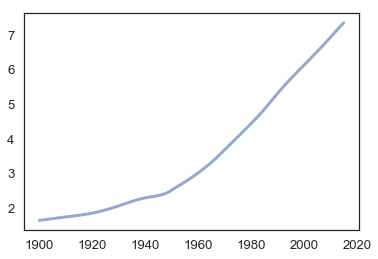

In [183]:
# Test plotting the data
plot(year1900, pop1900)

In [184]:
t_0 = year1900[0]
t_end = year1900[-1]
elapsed_time = t_end - t_0

p_0 = pop1900[0]
p_end = pop1900[-1]
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time

0.049560626947826085

In [185]:
# Model System object
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0.014,
                    beta = -0.003,
                    gamma = -0.00005)

,values
t_0,1900.000000
t_end,2015.000000
p_0,1.650000
annual_growth,0.049561
birth_rate,0.020000
death_rate,0.011000
alpha,0.014000
beta,-0.003000
gamma,-0.000050


In [239]:
# Run simulation
def run_sim(system, update_func):
    """Simulate the system using any update function
    system: System object
    update_func: function that computes the population next year
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], system)
    return results

In [187]:
# Update function: Proportional growth
def update_proportional(pop, system):
    """update function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    result = births - deaths + pop
    return result

In [240]:
population = run_sim(modelSystem, update_proportional);

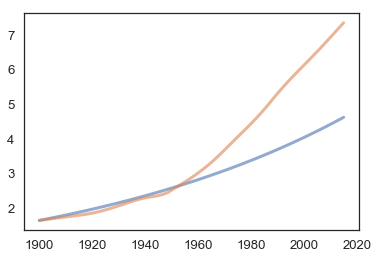

In [189]:
plot(population)
plot(year1900, pop1900)

In [190]:
# Update function: Quadratic growth
def update_quadratic(pop, system):
    """udpate function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    netGrowth = system.alpha * pop + system.beta * pop**2
    result = netGrowth + pop
    return result

In [191]:
def plot_results(modelPop, realPop, years, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(years, modelPop, ':', label='Model')
    plot(years, realPop, label='Data')    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [192]:
population = run_sim(modelSystem, update_quadratic);

In [361]:
# Model System object
# Best alpha and beta are 0.022, -0.007
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.03,
                    death_rate = 0.011,
                    alpha = 0.00022,
                    beta = -0.00007,
                    gamma = -0.00003);

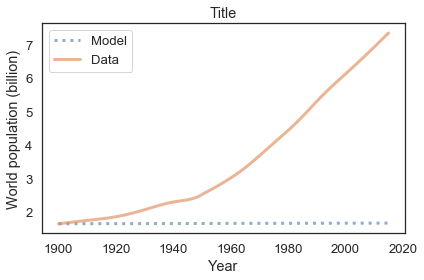

In [362]:
population = run_sim(modelSystem, update_quadratic);
plot_results(population, pop1900, year1900, "Title")

In [363]:
# Update function: polynomial growth
def update_poly(pop, system):
    """udpate function with proportional growth.
    
    system: System object
    pop: the current population
    returns: returns the new population
    """
    netGrowth = system.alpha * pop + system.beta * pop**2 + system.gamma * pop**3
    result = netGrowth + pop
    return result

In [364]:
population = run_sim(modelSystem, update_poly)

,values
1900,1.650000
1901,1.650038
1902,1.650075
1903,1.650113
1904,1.650151
1905,1.650188
1906,1.650226
1907,1.650263
1908,1.650301
1909,1.650339


In [196]:
# Use numpy polyfit to find the correct coefficient
coeff = np.polyfit(year1900, pop1900,3)

array([-6.43244330e-07,  4.27650205e-03, -9.29638468e+00,  6.63877016e+03])

In [197]:
population = run_sim(modelSystem, update_poly);

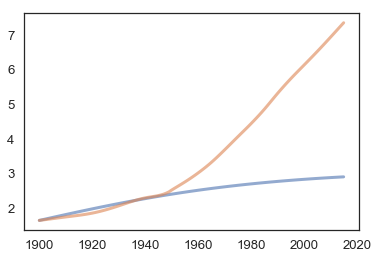

In [198]:
plot(population)
plot(year1900, pop1900)

In [199]:
growthRate1900 = np.diff(pop1900);

In [200]:
pop1900[-1]

7.349472099

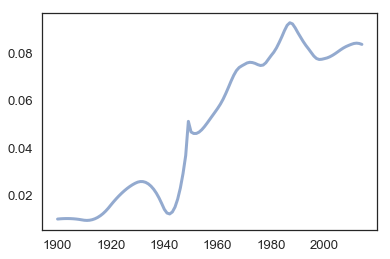

In [201]:
plot(year1900[:-1], growthRate1900)


In [202]:
growthRate1900[60]

0.05672934499999993

In [250]:
#
population = run_sim(modelSystem, update_poly);

In [251]:
population = run_sim(modelSystem, update_proportional);

In [204]:
# Test code for gradient descent and random stuff

In [345]:
def gradient_descent(runs, learning_rate, update_func):
    """Runs the run_sim function and updates the model system parameters
    
    runs: number of iterations of gradient descent
    learning_rate: size of descent steps per iteration
    returns: the final mean squared error  
    prints: the mean squared error for each run
    returns: an array containing the error over iterations
    """
    newWeight = 0;
    newWeight2 = 0;
    newBias = 0;
    error_log = SweepSeries()
    
    for i in range(runs):
        population = run_sim(modelSystem, update_func)
        newParams = update_weights(pop1900, population, newWeight, newWeight2, newBias, learning_rate);
        newWeight = newParams[0];
        newWeight2 = newParams[1];
        newBias = newParams[2];
        modelSystem.alpha = newWeight
        modelSystem.beta = newWeight2
        modelSystem.gamma = newBias
        error = cost_func(pop1900, population);
        print("Iteration: ", i, ", MS Error: ", error);
        error_log[i] = error;
        
    plot_results(population, pop1900, year1900, "Plot After Gradient Descent")
    print("Final error: ", error)
    return error_log

In [346]:
def cost_func(realPop, predictions):
    """calcaulate the mean squared error between the predictions and the actual
    
    realPop: the actual population vector
    predictions: the vector that the simulation generates
    returns: the mean squared error
    """
    n = len(realPop)
    total_error = 0.0
    for i in range(n):
        total_error += (realPop[i] - predictions[i+1900])**2 
    return total_error / n

In [401]:
def update_weights(realPop, predictions, weight, weight2, bias, learning_rate):
    """Update the weights to minimize the error
    
    realPop: actual population
    predictions: the current predicted value of population
    weight: parameter that is being optimized
    bias: another parameter that is being optimized
    learning_rate: the step size of each iteration
    """
    weight_deriv = 0
    weight2_deriv = 0
    bias_deriv = 0
    n = len(realPop)

    for i in range(n):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2 * (realPop[i] - (predictions[i+1900]))
        
        # Don't know how to find out how each weight contributes to the predictions
        # Another derivative for second weight parameter
        weight2_deriv += -2 * (realPop[i] - (predictions[i+1900]))

        # -2(y - (mx + b))
        bias_deriv += -2*(realPop[i] - (predictions[i+1900]))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / n) * learning_rate
    weight2 -= (weight2_deriv / n) * learning_rate
    bias -= (bias_deriv / n) * learning_rate

    return weight, weight2, bias

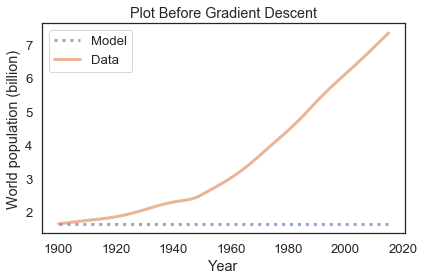

In [412]:
# Start off with bad fit
modelSystem.alpha = 0
modelSystem.beta = 0
population = run_sim(modelSystem, update_quadratic)
plot_results(population, pop1900, year1900, "Plot Before Gradient Descent")

Iteration:  0 , MS Error:  6.769149806458167
Iteration:  1 , MS Error:  6.541525655466592
Iteration:  2 , MS Error:  6.308809765980694
Iteration:  3 , MS Error:  6.07120446413047
Iteration:  4 , MS Error:  5.828971906664943
Iteration:  5 , MS Error:  5.582441149304279
Iteration:  6 , MS Error:  5.332015290479723
Iteration:  7 , MS Error:  5.078178453956721
Iteration:  8 , MS Error:  4.821502299289395
Iteration:  9 , MS Error:  4.562651665881346
Iteration:  10 , MS Error:  4.302388868313455
Iteration:  11 , MS Error:  4.041576073795886
Iteration:  12 , MS Error:  3.7811751165270246
Iteration:  13 , MS Error:  3.5222440513830566
Iteration:  14 , MS Error:  3.265929737255067
Iteration:  15 , MS Error:  3.0134557878304817
Iteration:  16 , MS Error:  2.7661053549992025
Iteration:  17 , MS Error:  2.525198435482122
Iteration:  18 , MS Error:  2.2920637260708
Iteration:  19 , MS Error:  2.0680054958323253
Iteration:  20 , MS Error:  1.8542664750216427
Iteration:  21 , MS Error:  1.65198833724

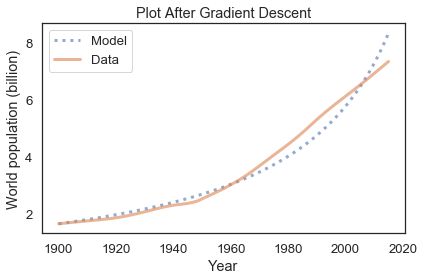

In [413]:
# Optimize birthrate with gradient descent
# Model System object
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0,
                    beta = 0,
                    gamma = 0,)
error_log = gradient_descent(50, 0.00004, update_quadratic);

In [399]:
modelSystem

,values
t_0,1900.000000
t_end,2015.000000
p_0,1.650000
annual_growth,0.049561
birth_rate,0.020000
death_rate,0.011000
alpha,0.000567
beta,0.000851
gamma,0.001135


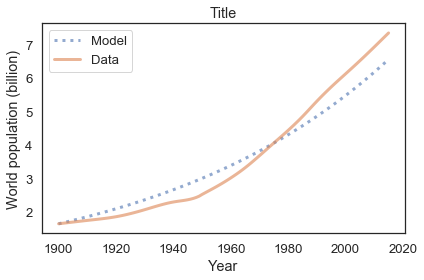

In [270]:
population = run_sim(modelSystem, update_proportional)
plot_results(population, pop1900, year1900, "Title")

In [370]:
# Model System object
modelSystem = System(t_0 = t_0,
                    t_end = t_end,
                    p_0 = p_0,
                    annual_growth = annual_growth,
                    birth_rate = 0.02,
                    death_rate = 0.011,
                    alpha = 0.00014,
                    beta = -0.00003,
                    gamma = -0.00005,)

,values
t_0,1900.000000
t_end,2015.000000
p_0,1.650000
annual_growth,0.049561
birth_rate,0.020000
death_rate,0.011000
alpha,0.000140
beta,-0.000030
gamma,-0.000050


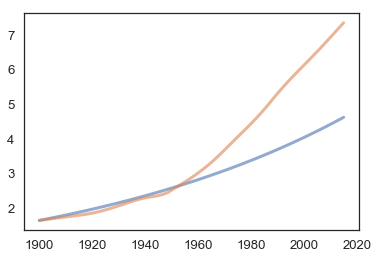

In [210]:
population = run_sim(modelSystem, update_proportional);
plot(population)
plot(year1900, pop1900)